### RFM 분석 실습
#### 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인하거나 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법이다. 구매 가능성이 높은 고객을 선정할 때 용이한 데이터 분석방법이며, 사용자들의 평소 구매 패턴을 기준으로 분류를 진행하기 때문에 각 사용자 그룹의 특성에 따라 차별화된 마케팅 메시지를 전달할 수 있다.
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- InvoiceNo: 주문 번호
- InvoiceDate: 주문 날짜
- StockCode	: 제품 코드
- Description: 상품 정보
- Quantity: 수량
- UnitPrice: 단가
- Country:지역

In [1]:
import pandas as pd

customer_invoice_df = pd.read_csv('./datasets/customer_invoice_data.csv')
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 결측치 검사
📌 결측치: 값이 없는 것, Null 또는 NA로 표현.

In [2]:
customer_invoice_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 중복 행 검사


In [3]:
customer_invoice_df.duplicated().sum()

5268

In [4]:
customer_invoice_df = customer_invoice_df.drop_duplicates()
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 데이터 전처리
> 데이터 유형을 변환하거나 데이터 분석에 용이한 형태로 변환하는 작업을 통해,  
불필요한 컬럼 삭제, 열 병합 등을 통해 데이터를 정제하는 처리방식
- InvoiceDate를 오늘 날짜로부터 몇 일 차이인지로 변환 후 최근 구매 척도인 Recency로 변환
- UnitPrice를 지출 금액의 척도인 Monetary로 변환
- CustomerID별 구매 횟수를 구매 빈도의 척도인 Frequency로 변환

In [5]:
customer_invoice_df.loc[:,['Recency']] = pd.to_datetime(customer_invoice_df['InvoiceDate'],dayfirst=False).apply(lambda x: (pd.to_datetime('2023-10-04',dayfirst=False) - x).days)
customer_invoice_df.drop(['InvoiceDate'], axis=1, inplace=True)

C:\Users\jangd\AppData\Local\Temp\ipykernel_16844\3047182359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_invoice_df.drop(['InvoiceDate'], axis=1, inplace=True)


In [6]:
customer_invoice_df.loc[:,['Monetary']] = customer_invoice_df['Quantity'] * customer_invoice_df['UnitPrice']
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Recency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,4689,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,4689,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,4689,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,4689,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,4689,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,4316,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,4316,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,4316,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,4316,16.60


In [18]:
frequency = ['CustomerID']
customer_invoice_df.loc[:, ['Frequency']] = customer_invoice_df.loc[:, frequency].sum(axis=1)
# customer_invoice_df = customer_invoice_df.drop(frequency, axis=1)
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Recency,Monetary,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,4689,15.30,17850.0
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,4689,20.34,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,4689,22.00,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,4689,20.34,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,4689,20.34,17850.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,4316,10.20,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,4316,12.60,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,4316,16.60,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,4316,16.60,12680.0


In [19]:
display(customer_invoice_df.groupby(by='CustomerID')[['InvoiceNo']].count().sort_values(by="CustomerID", ascending=False))
customer_invoice_df.groupby(by='CustomerID')[['InvoiceNo']].count()

,InvoiceNo
CustomerID,
18287.0,70
18283.0,721
18282.0,13
18281.0,7
18280.0,10
...,...
12350.0,17
12349.0,73
12348.0,31


,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [20]:
customer_invoice_df_rfm = customer_invoice_df.groupby('CustomerID') \
    .agg({'CustomerID': 'count', 'Recency': 'min', 'Monetary': 'sum'}) \
    .rename(columns={'CustomerID': 'Frequency'})

customer_invoice_df_rfm = customer_invoice_df_rfm.reset_index()

customer_invoice_df_rfm

,CustomerID,Frequency,Recency,Monetary
0,12346.0,2,4641,0.00
1,12347.0,182,4318,4310.00
2,12348.0,31,4391,1797.24
3,12349.0,73,4334,1757.55
4,12350.0,17,4626,334.40
...,...,...,...,...
4367,18280.0,10,4593,180.60
4368,18281.0,7,4496,80.82
4369,18282.0,13,4323,176.60
4370,18283.0,721,4319,2045.53


In [21]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()

rfm_normalization= normalization.fit_transform(customer_invoice_df_rfm[['Frequency', 'Recency', 'Monetary']])

In [22]:
print(type(customer_invoice_df_rfm))
rfm_normalization = pd.DataFrame(rfm_normalization, columns=['Frequency', 'Recency', 'Monetary'])
rfm_normalization

<class 'pandas.core.frame.DataFrame'>


,Frequency,Recency,Monetary
0,0.000128,0.871314,0.015109
1,0.023172,0.005362,0.030297
2,0.003841,0.201072,0.021442
3,0.009218,0.048257,0.021303
4,0.002048,0.831099,0.016288
...,...,...,...
4367,0.001152,0.742627,0.015746
4368,0.000768,0.482574,0.015394
4369,0.001536,0.018767,0.015731
4370,0.092178,0.008043,0.022317


In [23]:
customer_invoice_df_rfm[['Frequency', 'Recency', 'Monetary']] = rfm_normalization[['Frequency', 'Recency', 'Monetary']]
customer_invoice_df_rfm

,CustomerID,Frequency,Recency,Monetary
0,12346.0,0.000128,0.871314,0.015109
1,12347.0,0.023172,0.005362,0.030297
2,12348.0,0.003841,0.201072,0.021442
3,12349.0,0.009218,0.048257,0.021303
4,12350.0,0.002048,0.831099,0.016288
...,...,...,...,...
4367,18280.0,0.001152,0.742627,0.015746
4368,18281.0,0.000768,0.482574,0.015394
4369,18282.0,0.001536,0.018767,0.015731
4370,18283.0,0.092178,0.008043,0.022317


### 데이터 마이닝
- 대규모로 저장된 데이터안에서 체계적이고 자동적으로 통계적 규칙이나 짜임 또는 패턴을 분석하여, 가치있는 정보를 빼내는 과정이다.

### 클러스터 분석(Cluster analysis)
- 주어진 데이터들의 특성을 고려해 데이터 집단을 정의하고 데이터 집단을 대표할 수 있는 대표점을 찾는 것으로 데이터 마이닝의 한 방법이다.
- 클러스터란 비슷한 특성을 가진 데이터들의 집단이고 데이터의 성격에 따라 여러 클러스터(집단)으로 나뉠 수 있다.
- 머신러닝을 사용하여 분석할 수 있으며, 분리할 클러스터 개수를 알려줘야 한다.  
이 때, KElbowVisualizer를 사용해서 최적의 클러스터 개수(elbow)를 먼저 알아낼 수 있다.

### 병합 집단 알고리즘(Agglomerative clustering)
- 점과 점 사이의 거리값을 사용하여 샘플 데이터의 클러스터 쌍을 반복적으로 병합한다.
- 전달받은 클러스터 개수와 일치할 때 종료한다.

![](./images/agglomerative_clustering.png)

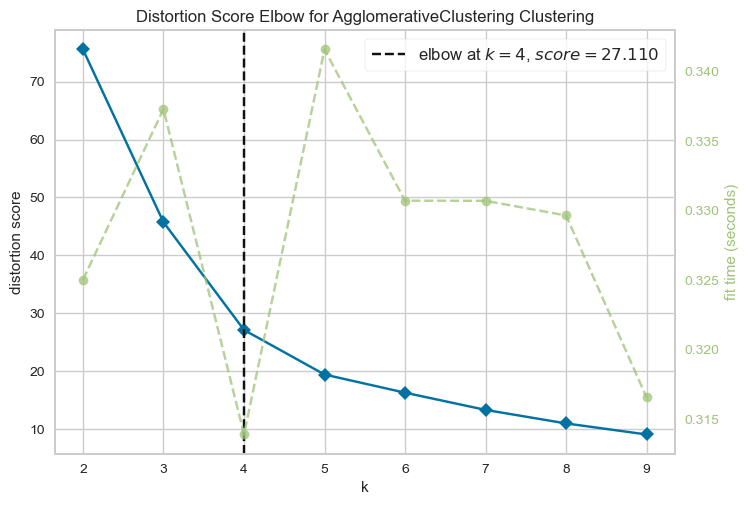

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

k_elbow_visualizer = KElbowVisualizer(model, k=(2, 10))
k_elbow_visualizer.fit(customer_invoice_df_rfm[['Frequency', 'Recency', 'Monetary']])
k_elbow_visualizer.show()

In [14]:
agloCluster = AgglomerativeClustering(n_clusters=4).fit(customer_invoice_df_rfm[['Frequency', 'Recency', 'Monetary']])
customer_invoice_df_rfm['cluster'] = agloCluster.labels_
print(customer_invoice_df_rfm['cluster'].value_counts())
customer_invoice_df_rfm

cluster
2    2161
0    1261
1     559
3     391
Name: count, dtype: int64


,CustomerID,Frequency,Recency,Monetary,cluster
0,12346.0,0.000128,0.871314,0.015109,3
1,12347.0,0.023172,0.005362,0.030297,2
2,12348.0,0.003841,0.201072,0.021442,0
3,12349.0,0.009218,0.048257,0.021303,2
4,12350.0,0.002048,0.831099,0.016288,3
...,...,...,...,...,...
4367,18280.0,0.001152,0.742627,0.015746,3
4368,18281.0,0.000768,0.482574,0.015394,1
4369,18282.0,0.001536,0.018767,0.015731,2
4370,18283.0,0.092178,0.008043,0.022317,2


### 시각화
- matplotlib를 사용하여 데이터를 시각화할 수 있고 이를 통해 한 눈에 볼 수 없는 많은 데이터를 한 눈에 볼 수 있다.
- 데이터 분석에 대한 전문 지식이 없는 일반인도 이해할 수 있다.
- 동일한 통계를 가지고 있더라도, 시각화 시 변화나 패턴이 다를 수 있다.

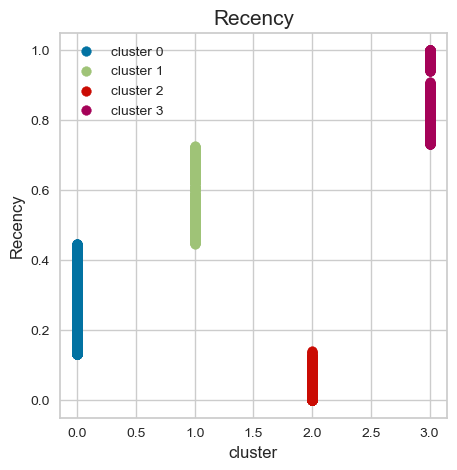

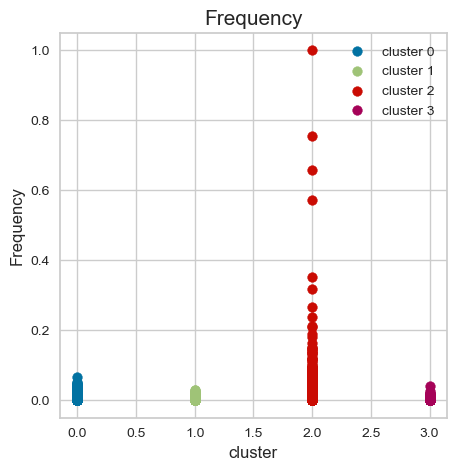

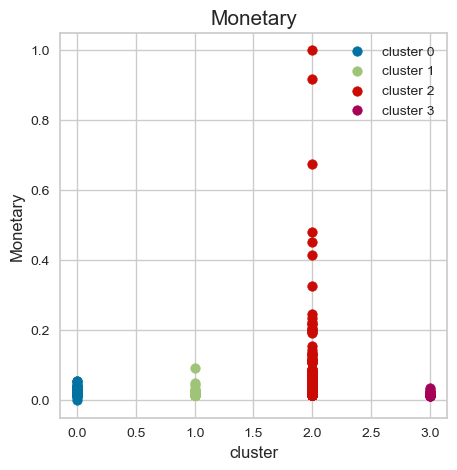

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency : 얼마나 최근에 구매했는가
# Frequency : 얼마나 자주 구매했는가
# Monetary : 얼마나 많은 금액을 지출했는가
titles = ['Recency', 'Frequency', 'Monetary']

# 집단 개수
k = 4

# 각 항목별
for title in titles:
    plt.figure(figsize = (5, 5))
    
#     집단 별
    for i in range(k):
#         scatter: 산점도(분포도)
        plt.scatter(customer_invoice_df_rfm.loc[customer_invoice_df_rfm['cluster'] == i, 'cluster'], 
                    customer_invoice_df_rfm.loc[customer_invoice_df_rfm['cluster'] == i, title],
                    label = f'cluster {i}')
    
#     색상별 제목(label) 표시
    plt.legend()
    plt.title(title, size = 15)
    plt.xlabel('cluster', size = 12)
    plt.ylabel(title, size = 12)
    plt.show()

### boxplot
- 데이터의 분포와 이상치를 한 번에 볼 수 있으며, 서로 다른 집단을 쉽게 비교할 수 있는 차트이다.

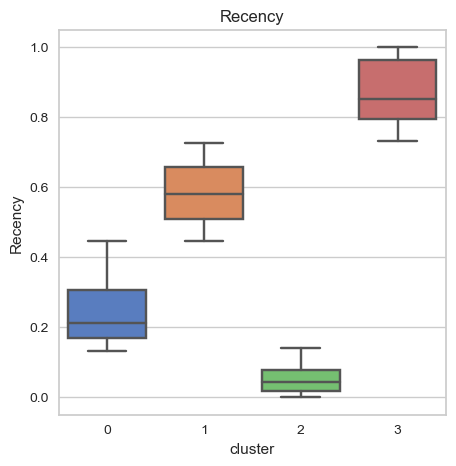

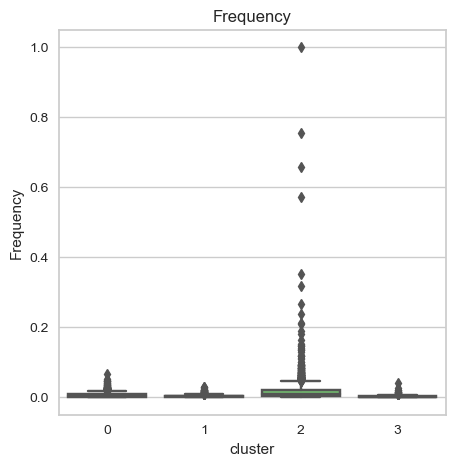

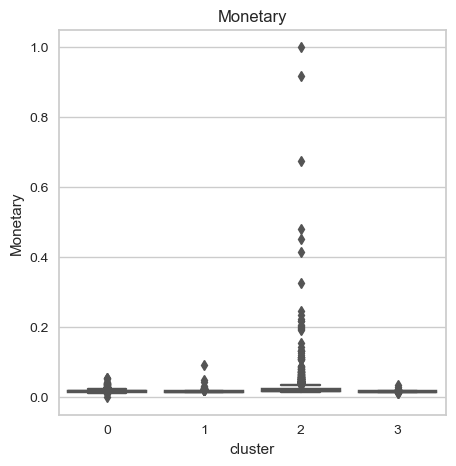

In [16]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize = (5, 5))
    sns.boxplot(x = customer_invoice_df_rfm.cluster, y = customer_invoice_df_rfm[title], palette='muted')
    plt.title(title)
    plt.show()

In [17]:
- R, F, M 점수는 1~4로 계산함.
- Cluster0과 3은 동점이기 때문에 최근 구매(R)의 중요 여부에 따라 고객 등급을 매길 수 있다.
- 여기서는 최근 구매를 더 중요하다고 가정한다.
> Cluster0: Gold, (4, 1, 2) = 7  
Cluster1: Bronze, (1, 1, 1) = 3  
Cluster2: VIP, (2, 4, 4) = 10  
Cluster3: Silver (3, 1, 3) = 7  

SyntaxError: invalid decimal literal (2454656801.py, line 1)

In [ ]:
customer_invoice_df_rfm['cluster'] = customer_invoice_df_rfm['cluster'].replace([0, 1, 2, 3], ['Gold', 'Bronze', 'VIP', 'Silver'])
customer_invoice_df_rfm

In [ ]:
order = ['Gold', 'Bronze', 'Silver', 'VIP']
# create a countplot
print('Cluster Count:')
print(customer_invoice_df_rfm['cluster'].value_counts())

sns.countplot(x='cluster', data=customer_invoice_df_rfm, palette='muted', order=order)
plt.title('Clusters')
plt.show()